In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("../../data/Leases.csv")
count_table = df['market'].value_counts().reset_index()
df_update = df.dropna(subset = ['internal_industry'])
df_update
count_table = df_update['internal_industry'].value_counts().reset_index()
count_table

,internal_industry,count
0,Financial Services and Insurance,4253
1,"Technology, Advertising, Media, and Information",3835
2,TBD,3786
3,"Business, Professional, and Consulting Service...",2665
4,Legal Services,2109
5,"Construction, Engineering and Architecture",1344
6,Healthcare,1253
7,Real Estate (except coworking providers),977
8,Associations and Non-profit Organizations (exc...,954
9,Retail,927


In [104]:
df_relevant = df[['year','quarter', 'market', 'region', 'city', 'state', 'internal_class', 'leasedSF', 'availability_proportion', 'internal_class_rent', 'overall_rent']]
df_relevant

,year,quarter,market,region,city,state,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent
0,2018,Q1,Atlanta,South,Atlanta,GA,A,24736.0,0.200109,27.655891,24.345689
1,2018,Q1,Atlanta,South,Atlanta,GA,A,965.0,0.200109,27.655891,24.345689
2,2018,Q1,Atlanta,South,Atlanta,GA,A,2215.0,0.200109,27.655891,24.345689
3,2018,Q1,Atlanta,South,Atlanta,GA,O,1925.0,0.193419,18.560886,24.345689
4,2018,Q1,Atlanta,South,Atlanta,GA,A,2404.0,0.200109,27.655891,24.345689
...,...,...,...,...,...,...,...,...,...,...,...
194680,2024,Q4,Tampa,South,Tampa,FL,A,19654.0,0.230000,32.980000,29.460000
194681,2024,Q4,Tampa,South,Tampa,FL,A,16224.0,0.230000,32.980000,29.460000
194682,2024,Q4,Tampa,South,Tampa,FL,O,8475.0,0.168000,25.600000,29.460000
194683,2024,Q4,Tampa,South,Tampa,FL,A,2014.0,0.230000,32.980000,29.460000


In [105]:
df_average = df_relevant.groupby(['year', 'quarter', 'market', 'internal_class']).agg({
    'leasedSF': 'mean',
    'availability_proportion' : 'mean',
    'internal_class_rent' : 'mean',
    'overall_rent' : 'mean'
    }).reset_index()
df_average

,year,quarter,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent
0,2018,Q1,Atlanta,A,9245.769231,0.200109,27.655891,24.345689
1,2018,Q1,Atlanta,O,4449.100000,0.193419,18.560886,24.345689
2,2018,Q1,Austin,A,16182.103774,0.116311,40.384706,36.596618
3,2018,Q1,Austin,O,1978.108696,0.121082,30.118658,36.596618
4,2018,Q1,Baltimore,A,6662.877193,0.166045,27.104835,22.954034
...,...,...,...,...,...,...,...,...
1619,2024,Q4,Southern Maryland,O,3352.465116,NaN,NaN,NaN
1620,2024,Q4,Tampa,A,15105.568627,0.230000,32.980000,29.460000
1621,2024,Q4,Tampa,O,2985.311927,0.168000,25.600000,29.460000
1622,2024,Q4,Washington D.C.,A,18763.000000,NaN,NaN,NaN


In [106]:
df_cleaned = df_average.dropna(subset=['availability_proportion', 'internal_class_rent'])
df_cleaned


,year,quarter,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent
0,2018,Q1,Atlanta,A,9245.769231,0.200109,27.655891,24.345689
1,2018,Q1,Atlanta,O,4449.100000,0.193419,18.560886,24.345689
2,2018,Q1,Austin,A,16182.103774,0.116311,40.384706,36.596618
3,2018,Q1,Austin,O,1978.108696,0.121082,30.118658,36.596618
4,2018,Q1,Baltimore,A,6662.877193,0.166045,27.104835,22.954034
...,...,...,...,...,...,...,...,...
1613,2024,Q4,Seattle,O,4053.008197,0.241766,35.780000,45.200000
1616,2024,Q4,South Florida,A,6530.568889,0.202000,54.660000,47.700000
1617,2024,Q4,South Florida,O,2641.686833,0.150000,37.010000,47.700000
1620,2024,Q4,Tampa,A,15105.568627,0.230000,32.980000,29.460000


In [107]:
df_year = df_cleaned.groupby(['year', 'market', 'internal_class']).agg({
    'leasedSF': 'mean',
    'availability_proportion' : 'mean',
    'internal_class_rent' : 'mean',
    'overall_rent' : 'mean'
    }).reset_index()
df_year

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866
1,2018,Atlanta,O,4234.521137,0.187524,20.035054,25.823866
2,2018,Austin,A,12539.228572,0.118624,39.658007,35.604411
3,2018,Austin,O,3346.342617,0.123462,29.693692,35.604411
4,2018,Baltimore,A,5924.403524,0.170479,27.031583,23.348709
...,...,...,...,...,...,...,...
289,2024,Seattle,O,4465.269970,0.248231,35.795199,45.458051
290,2024,South Florida,A,6342.998964,0.205473,52.089803,45.370039
291,2024,South Florida,O,2695.508959,0.163101,36.155148,45.370039
292,2024,Tampa,A,10540.680351,0.244207,33.189818,29.586111


In [108]:
df_year_A = df_year[df_year["internal_class"] == 'A']
df_year_O = df_year[df_year["internal_class"] == 'O']
df_year_A


,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866
2,2018,Austin,A,12539.228572,0.118624,39.658007,35.604411
4,2018,Baltimore,A,5924.403524,0.170479,27.031583,23.348709
6,2018,Boston,A,12303.956380,0.136360,42.657058,32.983928
8,2018,Charlotte,A,13079.149401,0.163030,29.541666,26.929282
...,...,...,...,...,...,...,...
284,2024,San Diego,A,7622.318673,0.266555,46.562107,41.776359
286,2024,San Francisco,A,14884.428490,0.344625,74.881041,68.397889
288,2024,Seattle,A,13285.769792,0.300871,50.850166,45.458051
290,2024,South Florida,A,6342.998964,0.205473,52.089803,45.370039


In [109]:
# First ensure data is sorted by market and year
df_sorted_A = df_year_A.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_sorted_A['rent_growth'] = df_sorted_A.groupby('market')['internal_class_rent'].pct_change() * 100
df_sorted_A['rent_growth'] = df_sorted_A['rent_growth'].fillna(0)

df_sorted_A['availability_growth'] = df_sorted_A.groupby('market')['availability_proportion'].pct_change() * 100
df_sorted_A['availability_growth'] = df_sorted_A['availability_growth'].fillna(0)

df_sorted_A

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,rent_growth,availability_growth
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866,0.000000,0.000000
42,2019,Atlanta,A,11016.343476,0.206266,30.379910,27.234913,4.850518,0.418756
84,2020,Atlanta,A,10413.860650,0.240211,32.385357,29.212861,6.601226,16.457213
126,2021,Atlanta,A,8641.893893,0.287618,32.543294,29.864276,0.487679,19.735515
168,2022,Atlanta,A,8358.160661,0.301789,33.199192,30.682647,2.015463,4.926869
...,...,...,...,...,...,...,...,...,...
124,2020,Tampa,A,8528.362386,0.158688,31.001773,26.169932,-0.743564,13.427635
166,2021,Tampa,A,8953.590745,0.219696,31.930084,27.277867,2.994382,38.445906
208,2022,Tampa,A,8964.595017,0.231172,32.663850,28.240654,2.298038,5.223285
250,2023,Tampa,A,7524.950069,0.240906,32.338345,28.509292,-0.996528,4.210844


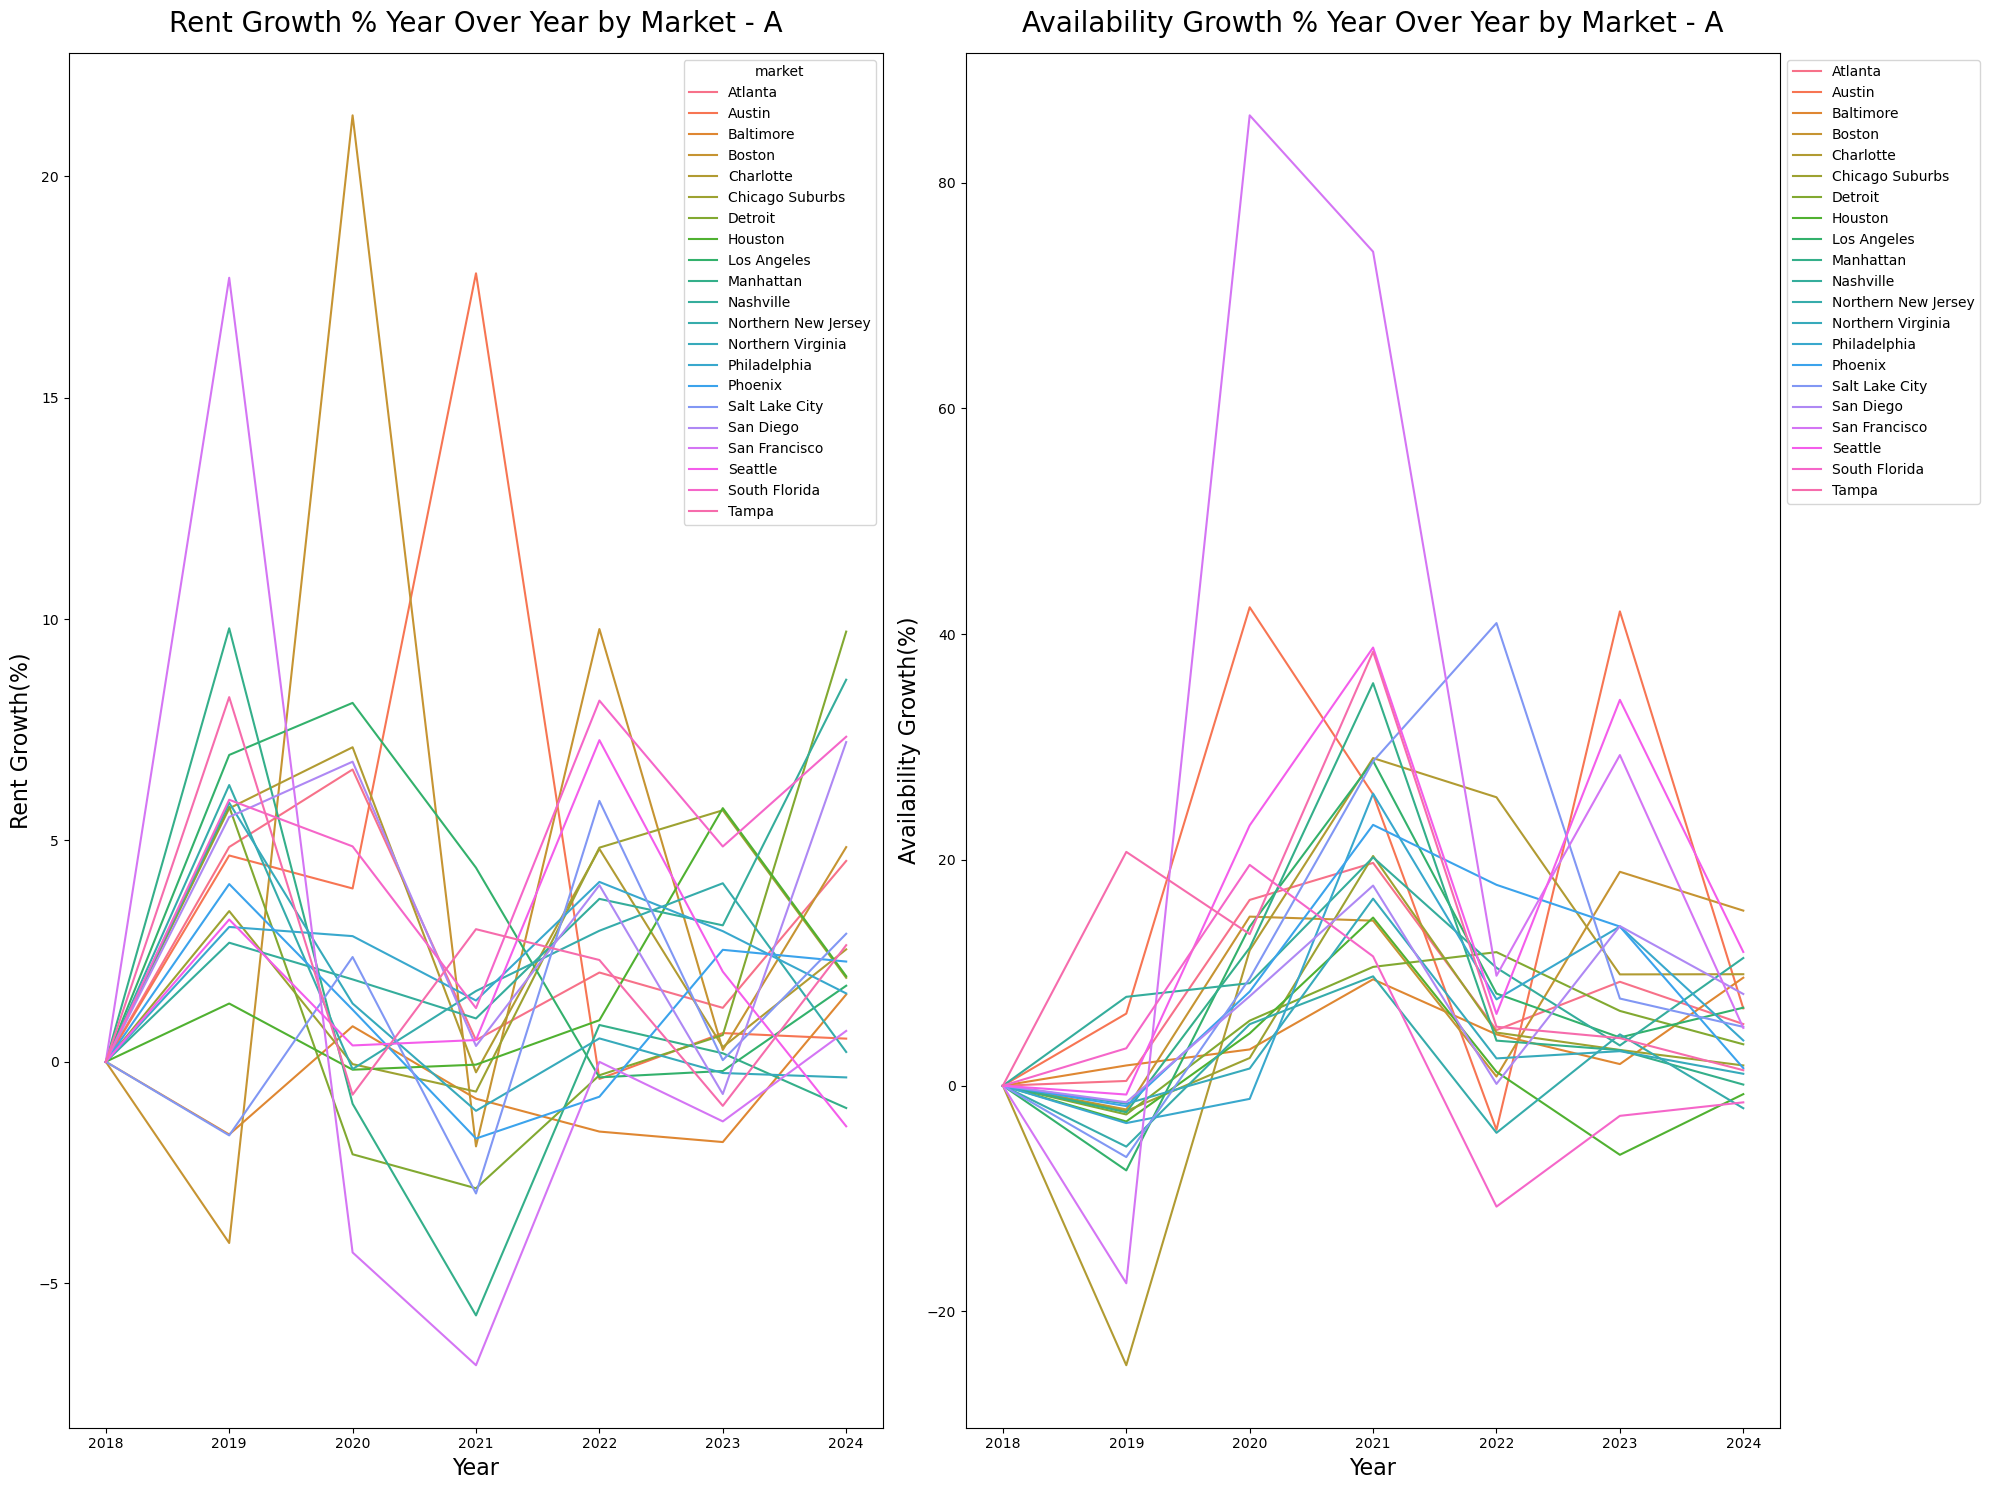

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))  # 1 row, 2 columns

# First plot
sns.lineplot(data=df_sorted_A, x='year', y='rent_growth', hue='market', ax=axes[0])
axes[0].set_title('Rent Growth % Year Over Year by Market - A', fontsize = 20, pad=15)
axes[0].set_xlabel('Year', fontsize = 16)
axes[0].set_ylabel('Rent Growth(%)', fontsize = 16)


# Second plot (example: another variable)
sns.lineplot(data=df_sorted_A, x='year', y='availability_growth', hue='market', ax=axes[1])
axes[1].set_title('Availability Growth % Year Over Year by Market - A', fontsize = 20, pad=15)
axes[1].set_xlabel('Year', fontsize = 16)
axes[1].set_ylabel('Availability Growth(%)', fontsize = 16)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.tight_layout()
plt.show()


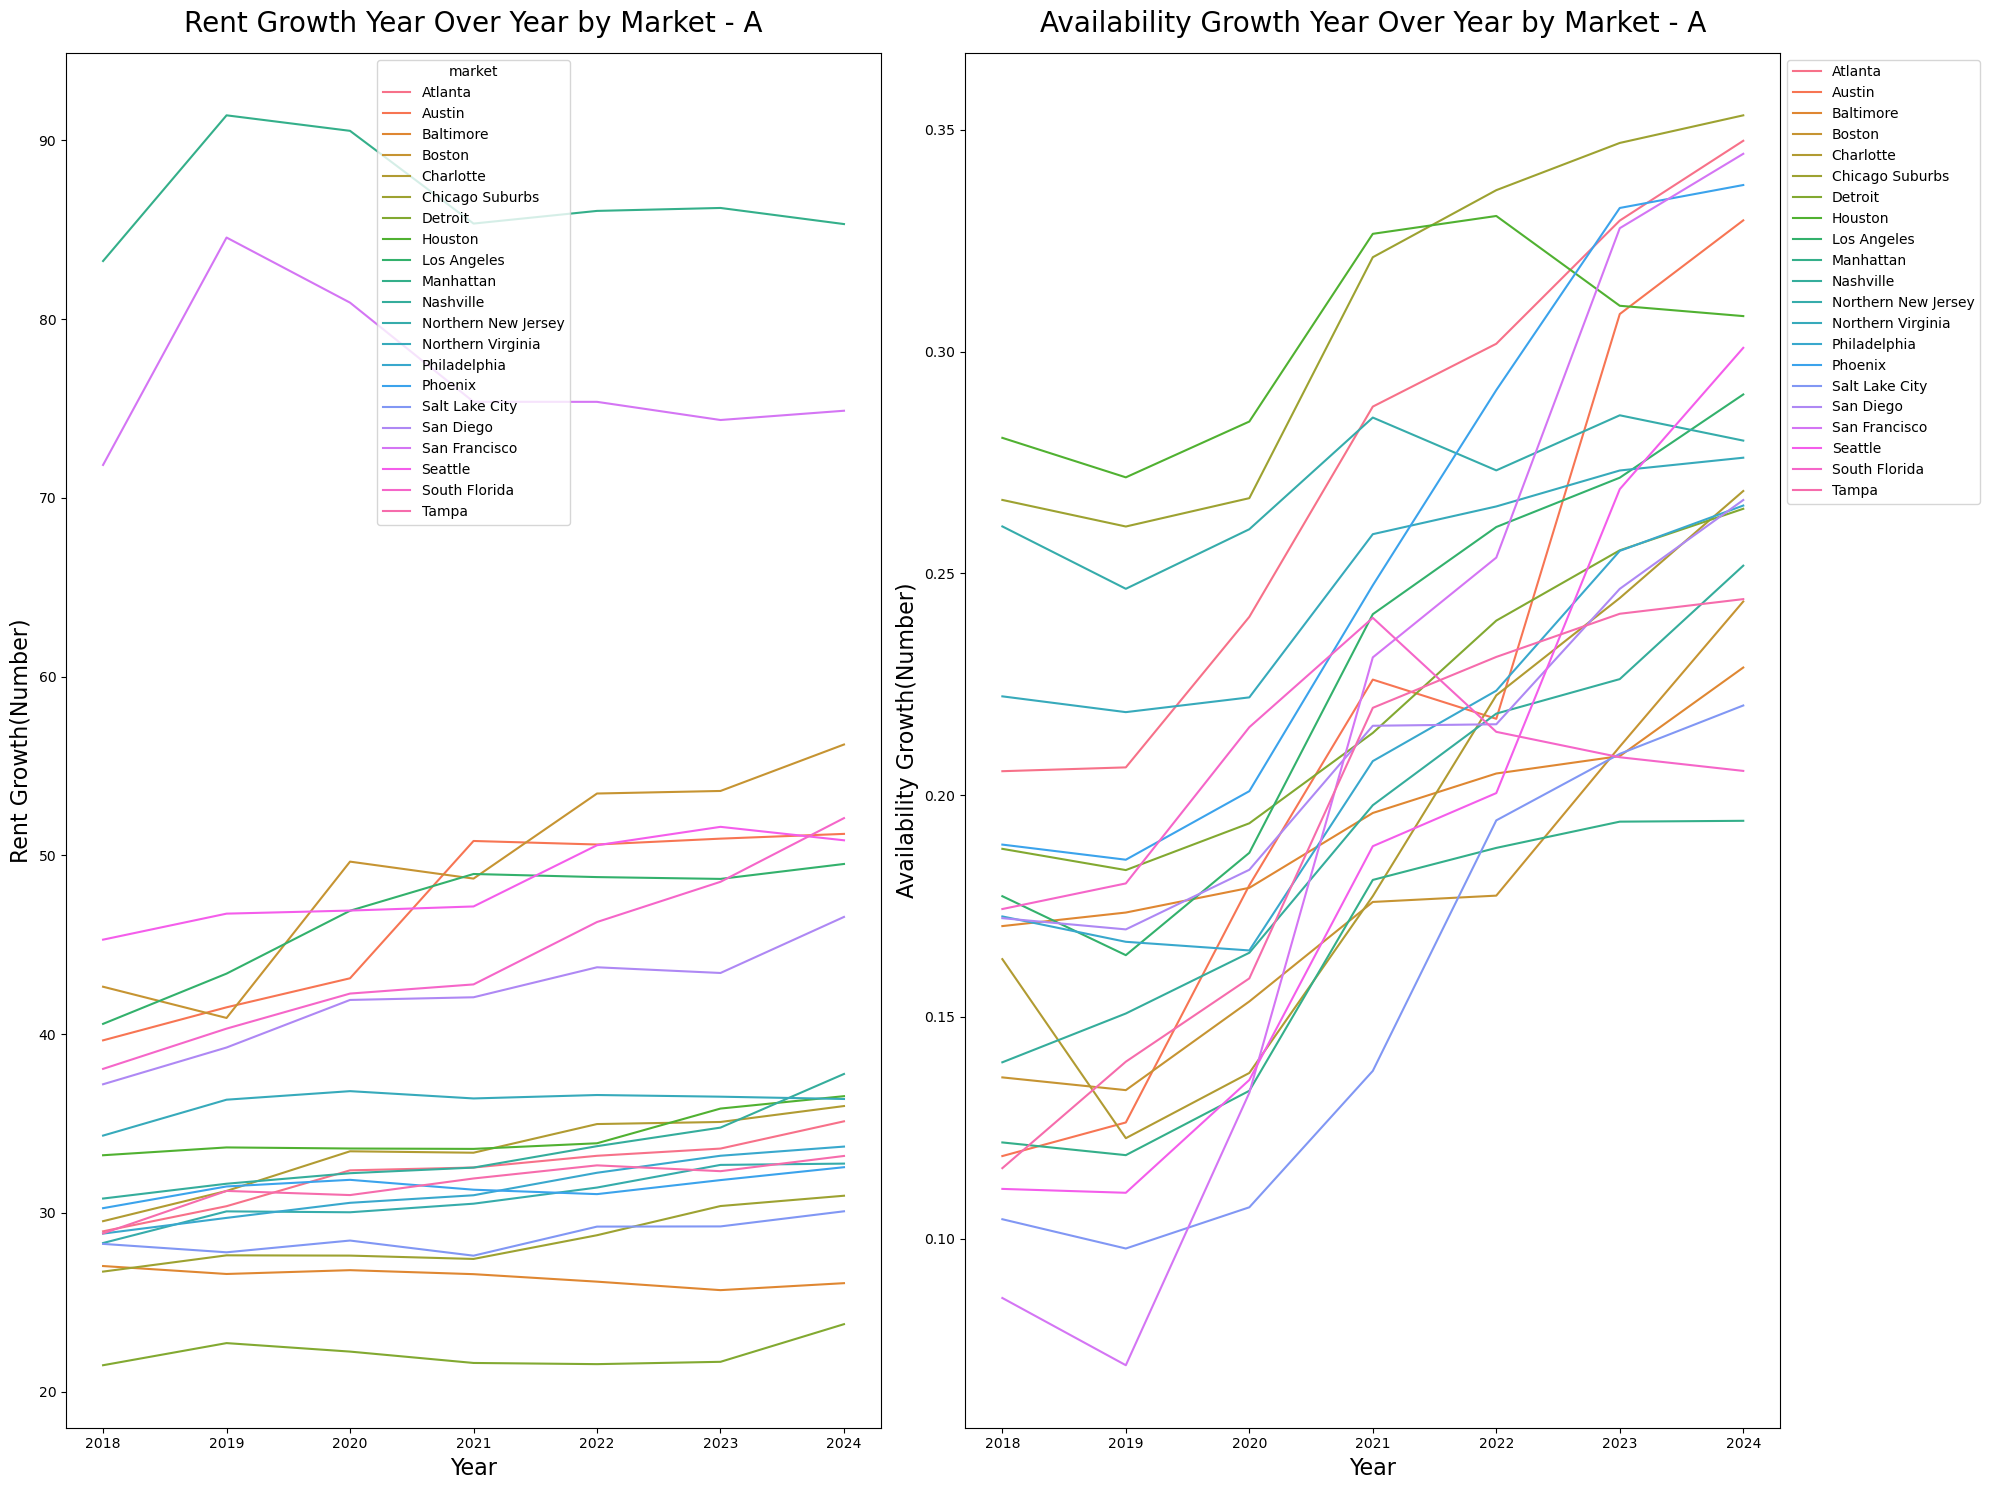

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))  # 1 row, 2 columns

# First plot
sns.lineplot(data=df_sorted_A, x='year', y='internal_class_rent', hue='market', ax=axes[0])
axes[0].set_title('Rent Growth Year Over Year by Market - A', fontsize = 20, pad=15)
axes[0].set_xlabel('Year', fontsize = 16)
axes[0].set_ylabel('Rent Growth(Number)', fontsize = 16)


# Second plot (example: another variable)
sns.lineplot(data=df_sorted_A, x='year', y='availability_proportion', hue='market', ax=axes[1])
axes[1].set_title('Availability Growth Year Over Year by Market - A', fontsize = 20, pad=15)
axes[1].set_xlabel('Year', fontsize = 16)
axes[1].set_ylabel('Availability Growth(Number)', fontsize = 16)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.tight_layout()
plt.show()

In [112]:
# First ensure data is sorted by market and year
df_sorted_O = df_year_O.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_sorted_O['rent_growth'] = df_sorted_O.groupby('market')['internal_class_rent'].pct_change() * 100
df_sorted_O['rent_growth'] = df_sorted_O['rent_growth'].fillna(0)

df_sorted_O['availability_growth'] = df_sorted_O.groupby('market')['availability_proportion'].pct_change() * 100
df_sorted_O['availability_growth'] = df_sorted_O['availability_growth'].fillna(0)

df_sorted_O

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,rent_growth,availability_growth
1,2018,Atlanta,O,4234.521137,0.187524,20.035054,25.823866,0.000000,0.000000
43,2019,Atlanta,O,4745.760471,0.175431,20.961762,27.234913,4.625436,-6.448553
85,2020,Atlanta,O,3324.070559,0.192106,22.130277,29.212861,5.574504,9.505091
127,2021,Atlanta,O,3524.484575,0.219384,23.431151,29.864276,5.878255,14.199462
169,2022,Atlanta,O,5094.064520,0.194369,23.620519,30.682647,0.808189,-11.402538
...,...,...,...,...,...,...,...,...,...
125,2020,Tampa,O,4644.824800,0.165174,22.506323,26.169932,4.402873,1.204920
167,2021,Tampa,O,3962.634543,0.171926,23.333051,27.277867,3.673311,4.087788
209,2022,Tampa,O,3781.186899,0.183647,24.302225,28.240654,4.153655,6.817143
251,2023,Tampa,O,3285.545472,0.172364,24.748437,28.509292,1.836094,-6.143627


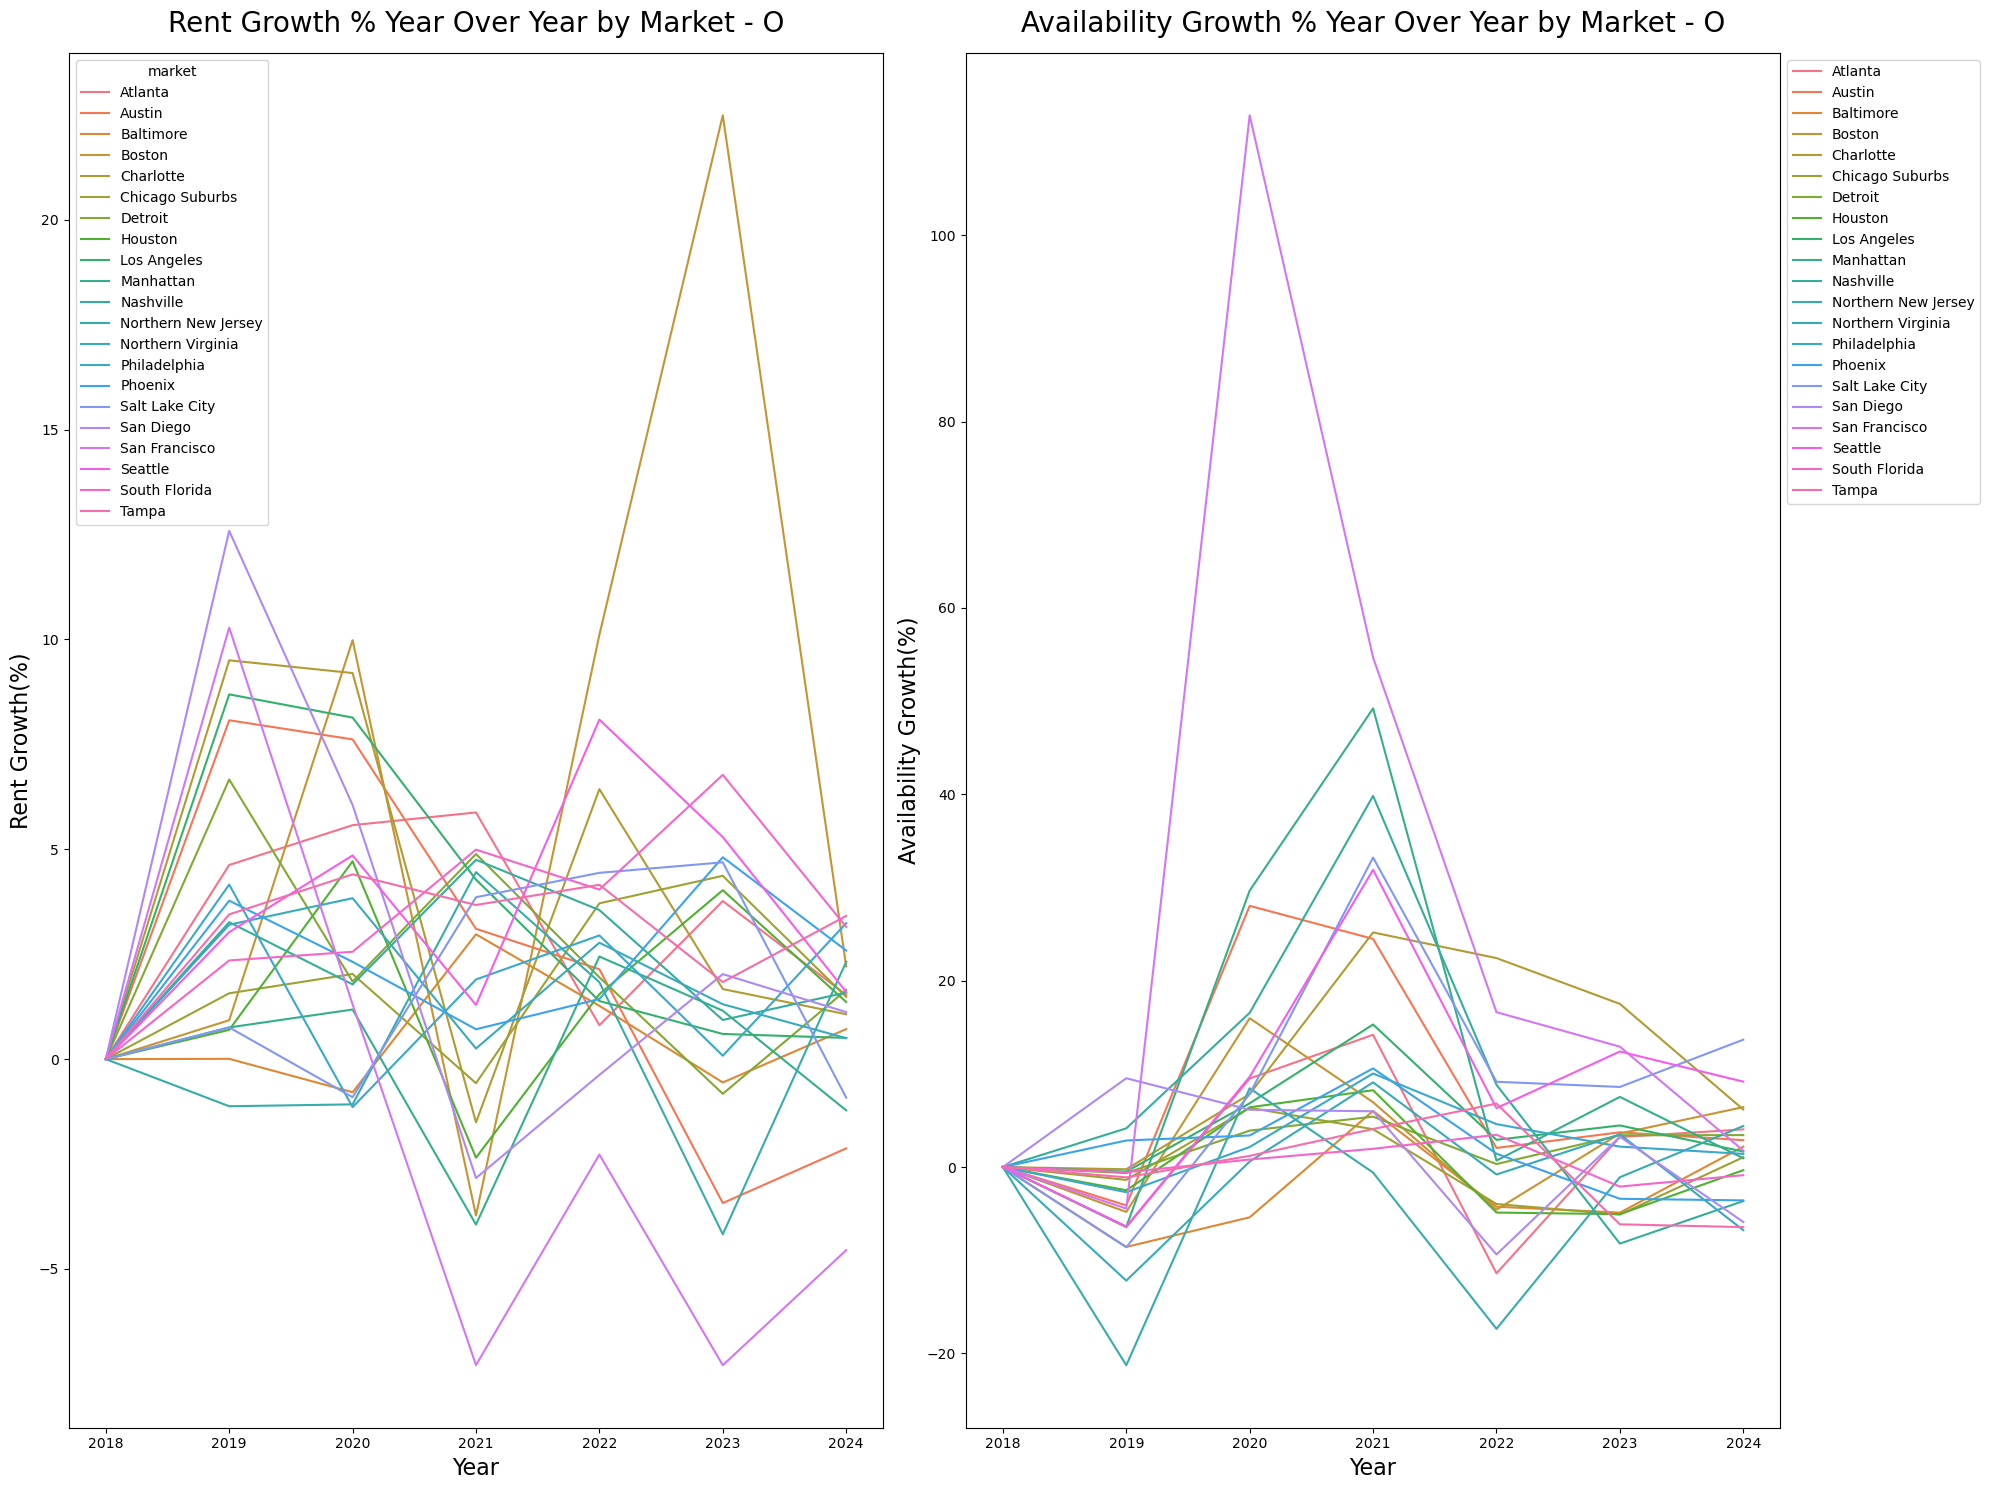

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))  # 1 row, 2 columns

# First plot
sns.lineplot(data=df_sorted_O, x='year', y='rent_growth', hue='market', ax=axes[0])
axes[0].set_title('Rent Growth % Year Over Year by Market - O', fontsize = 20, pad=15)
axes[0].set_xlabel('Year', fontsize = 16)
axes[0].set_ylabel('Rent Growth(%)', fontsize = 16)


# Second plot (example: another variable)
sns.lineplot(data=df_sorted_O, x='year', y='availability_growth', hue='market', ax=axes[1])
axes[1].set_title('Availability Growth % Year Over Year by Market - O', fontsize = 20, pad=15)
axes[1].set_xlabel('Year', fontsize = 16)
axes[1].set_ylabel('Availability Growth(%)', fontsize = 16)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.tight_layout()
plt.show()

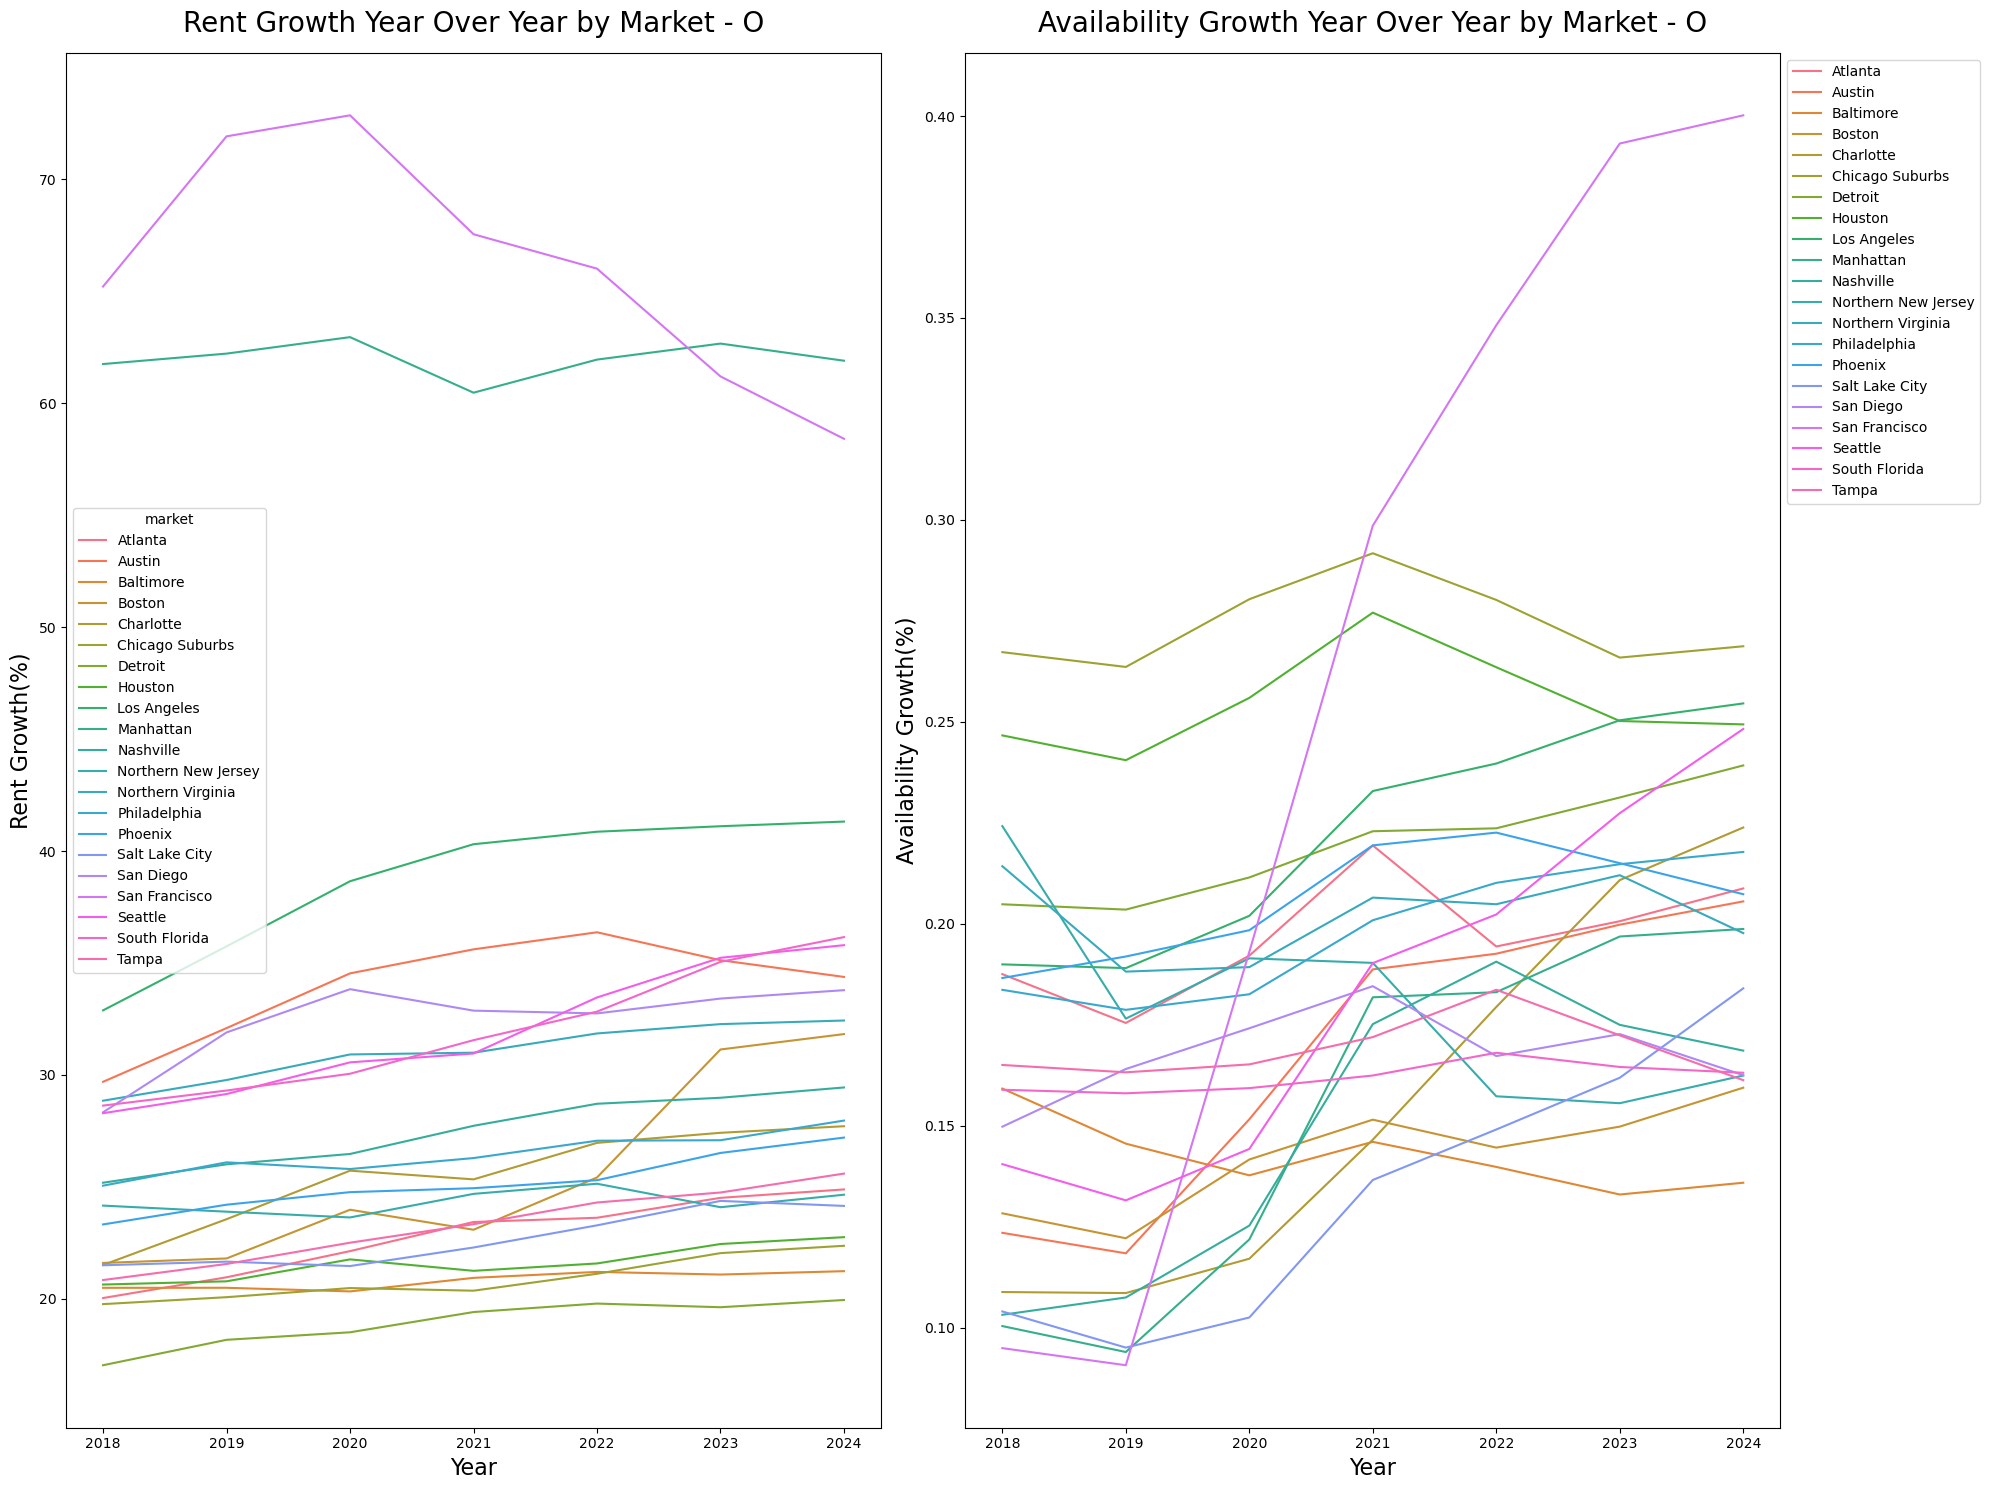

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))  # 1 row, 2 columns

# First plot
sns.lineplot(data=df_sorted_O, x='year', y='internal_class_rent', hue='market', ax=axes[0])
axes[0].set_title('Rent Growth Year Over Year by Market - O', fontsize = 20, pad=15)
axes[0].set_xlabel('Year', fontsize = 16)
axes[0].set_ylabel('Rent Growth(%)', fontsize = 16)


# Second plot (example: another variable)
sns.lineplot(data=df_sorted_O, x='year', y='availability_proportion', hue='market', ax=axes[1])
axes[1].set_title('Availability Growth Year Over Year by Market - O', fontsize = 20, pad=15)
axes[1].set_xlabel('Year', fontsize = 16)
axes[1].set_ylabel('Availability Growth(%)', fontsize = 16)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.tight_layout()
plt.show()

In [115]:
df_sorted_A['enhanced_growth'] = -1*df_sorted_A['rent_growth'] + df_sorted_A['availability_growth']
df_sorted_O['enhanced_growth'] = -1*df_sorted_O['rent_growth'] + df_sorted_O['availability_growth']
df_sorted_A

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,rent_growth,availability_growth,enhanced_growth
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866,0.000000,0.000000,0.000000
42,2019,Atlanta,A,11016.343476,0.206266,30.379910,27.234913,4.850518,0.418756,-4.431762
84,2020,Atlanta,A,10413.860650,0.240211,32.385357,29.212861,6.601226,16.457213,9.855986
126,2021,Atlanta,A,8641.893893,0.287618,32.543294,29.864276,0.487679,19.735515,19.247836
168,2022,Atlanta,A,8358.160661,0.301789,33.199192,30.682647,2.015463,4.926869,2.911406
...,...,...,...,...,...,...,...,...,...,...
124,2020,Tampa,A,8528.362386,0.158688,31.001773,26.169932,-0.743564,13.427635,14.171199
166,2021,Tampa,A,8953.590745,0.219696,31.930084,27.277867,2.994382,38.445906,35.451524
208,2022,Tampa,A,8964.595017,0.231172,32.663850,28.240654,2.298038,5.223285,2.925247
250,2023,Tampa,A,7524.950069,0.240906,32.338345,28.509292,-0.996528,4.210844,5.207371


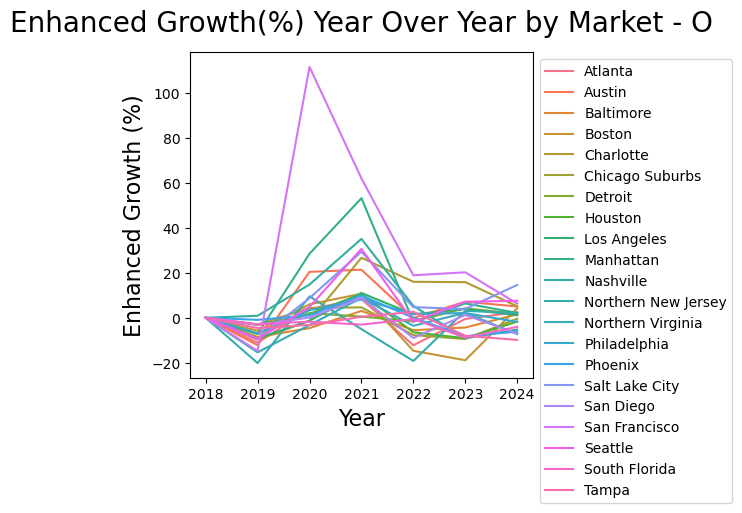

In [116]:
# First plot
sns.lineplot(data=df_sorted_O, x='year', y='enhanced_growth', hue='market')
plt.title('Enhanced Growth(%) Year Over Year by Market - O', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Enhanced Growth (%)', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

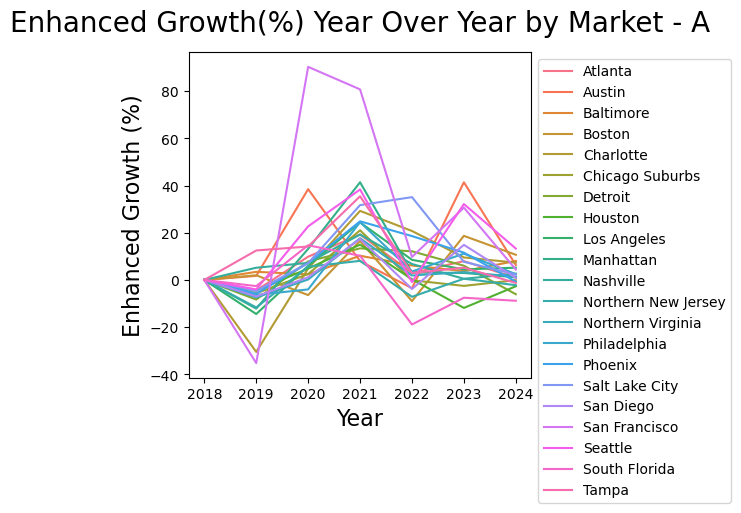

In [117]:
# First plot
sns.lineplot(data=df_sorted_A, x='year', y='enhanced_growth', hue='market')
plt.title('Enhanced Growth(%) Year Over Year by Market - A', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Enhanced Growth (%)', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [119]:
# First ensure data is sorted by market and year
df_double_sorted_A = df_sorted_A.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_double_sorted_A['cumulative_growth_factor'] = df_double_sorted_A.groupby('market')['enhanced_growth'].cumsum()

# First ensure data is sorted by market and year
df_double_sorted_O = df_sorted_O.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_double_sorted_O['cumulative_growth_factor'] = df_double_sorted_O.groupby('market')['enhanced_growth'].cumsum()

df_double_sorted_O

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,rent_growth,availability_growth,enhanced_growth,cumulative_growth_factor
1,2018,Atlanta,O,4234.521137,0.187524,20.035054,25.823866,0.000000,0.000000,0.000000,0.000000
43,2019,Atlanta,O,4745.760471,0.175431,20.961762,27.234913,4.625436,-6.448553,-11.073989,-11.073989
85,2020,Atlanta,O,3324.070559,0.192106,22.130277,29.212861,5.574504,9.505091,3.930586,-7.143402
127,2021,Atlanta,O,3524.484575,0.219384,23.431151,29.864276,5.878255,14.199462,8.321207,1.177805
169,2022,Atlanta,O,5094.064520,0.194369,23.620519,30.682647,0.808189,-11.402538,-12.210727,-11.032922
...,...,...,...,...,...,...,...,...,...,...,...
125,2020,Tampa,O,4644.824800,0.165174,22.506323,26.169932,4.402873,1.204920,-3.197952,-7.748629
167,2021,Tampa,O,3962.634543,0.171926,23.333051,27.277867,3.673311,4.087788,0.414477,-7.334153
209,2022,Tampa,O,3781.186899,0.183647,24.302225,28.240654,4.153655,6.817143,2.663487,-4.670665
251,2023,Tampa,O,3285.545472,0.172364,24.748437,28.509292,1.836094,-6.143627,-7.979722,-12.650387


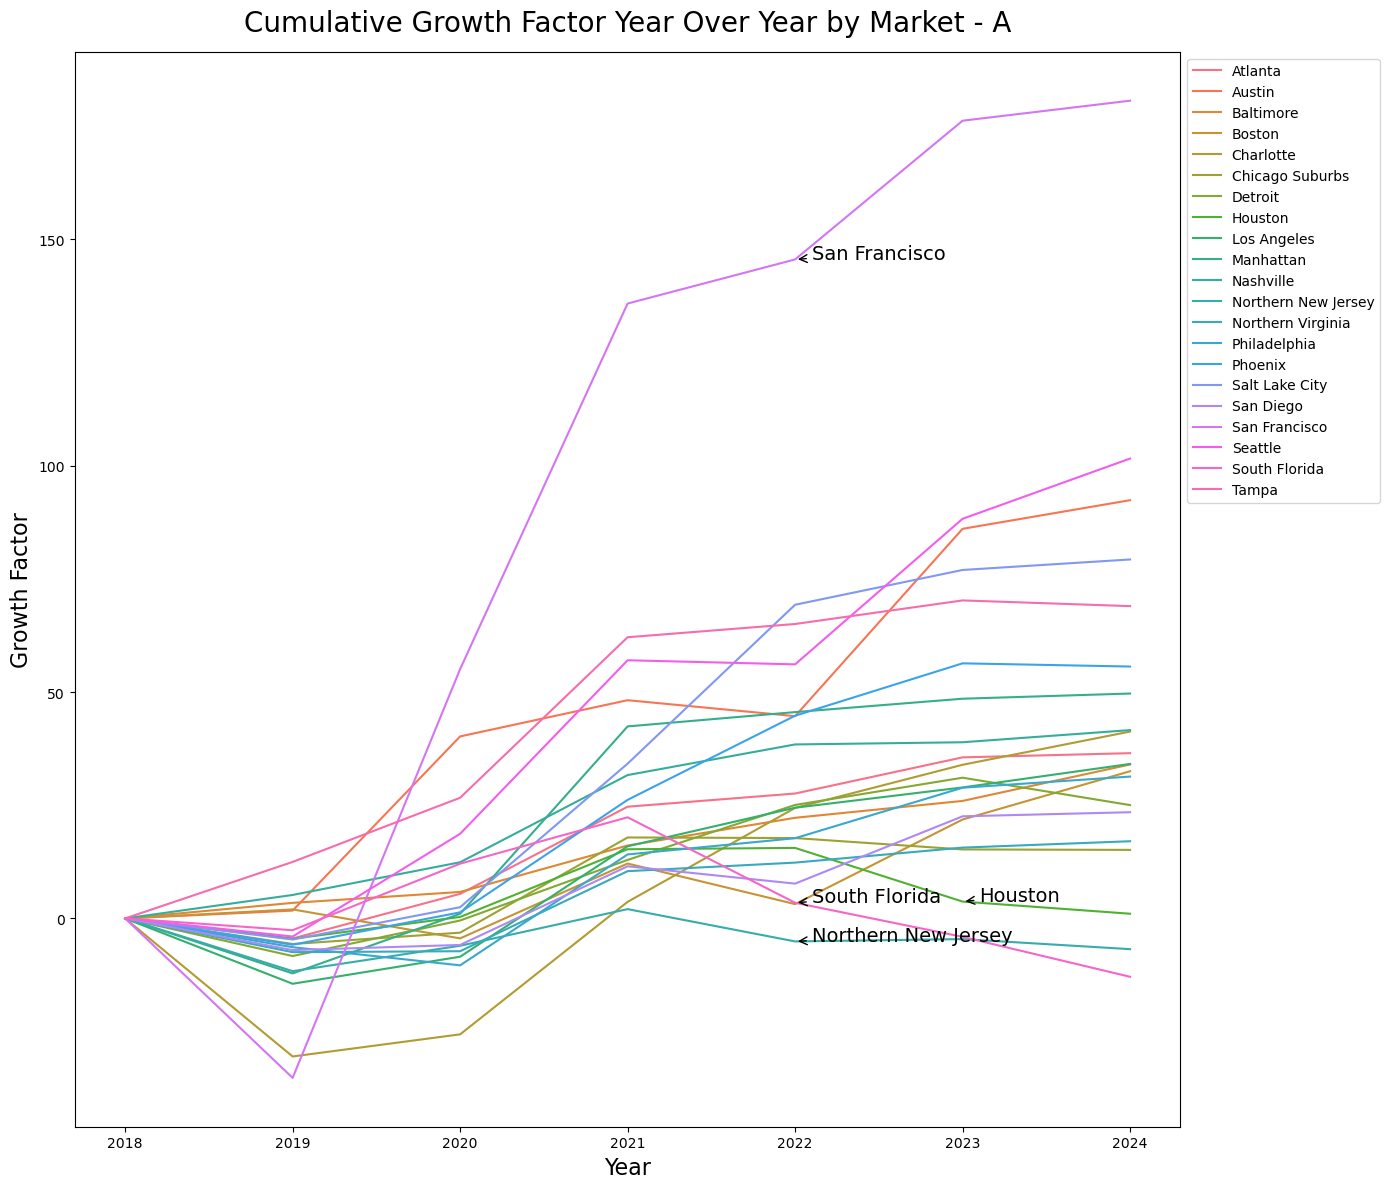

In [169]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=df_double_sorted_A, x='year', y='cumulative_growth_factor', hue='market')
plt.title('Cumulative Growth Factor Year Over Year by Market - A', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

last_year = 2022
last_value = df_double_sorted_A[df_double_sorted_A['market'] == 'San Francisco'].loc[df_double_sorted_A['year'] == last_year, 'cumulative_growth_factor'].values[0]

# Annotate the plot with the market name
plt.annotate('San Francisco', 
                xy=(last_year, last_value), 
                xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                arrowprops=dict(arrowstyle="->", color='black'),
                fontsize=14)

last_year = 2022
last_value = df_double_sorted_A[df_double_sorted_A['market'] == 'Northern New Jersey'].loc[df_double_sorted_A['year'] == last_year, 'cumulative_growth_factor'].values[0]

# Annotate the plot with the market name
plt.annotate('Northern New Jersey', 
                xy=(last_year, last_value), 
                xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                arrowprops=dict(arrowstyle="->", color='black'),
                fontsize=14)

last_year = 2022
last_value = df_double_sorted_A[df_double_sorted_A['market'] == 'South Florida'].loc[df_double_sorted_A['year'] == last_year, 'cumulative_growth_factor'].values[0]

# Annotate the plot with the market name
plt.annotate('South Florida', 
                xy=(last_year, last_value), 
                xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                arrowprops=dict(arrowstyle="->", color='black'),
                fontsize=14)

last_year = 2023
last_value = df_double_sorted_A[df_double_sorted_A['market'] == 'Houston'].loc[df_double_sorted_A['year'] == last_year, 'cumulative_growth_factor'].values[0]

# Annotate the plot with the market name
plt.annotate('Houston', 
                xy=(last_year, last_value), 
                xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                arrowprops=dict(arrowstyle="->", color='black'),
                fontsize=14)

plt.tight_layout()
plt.show()

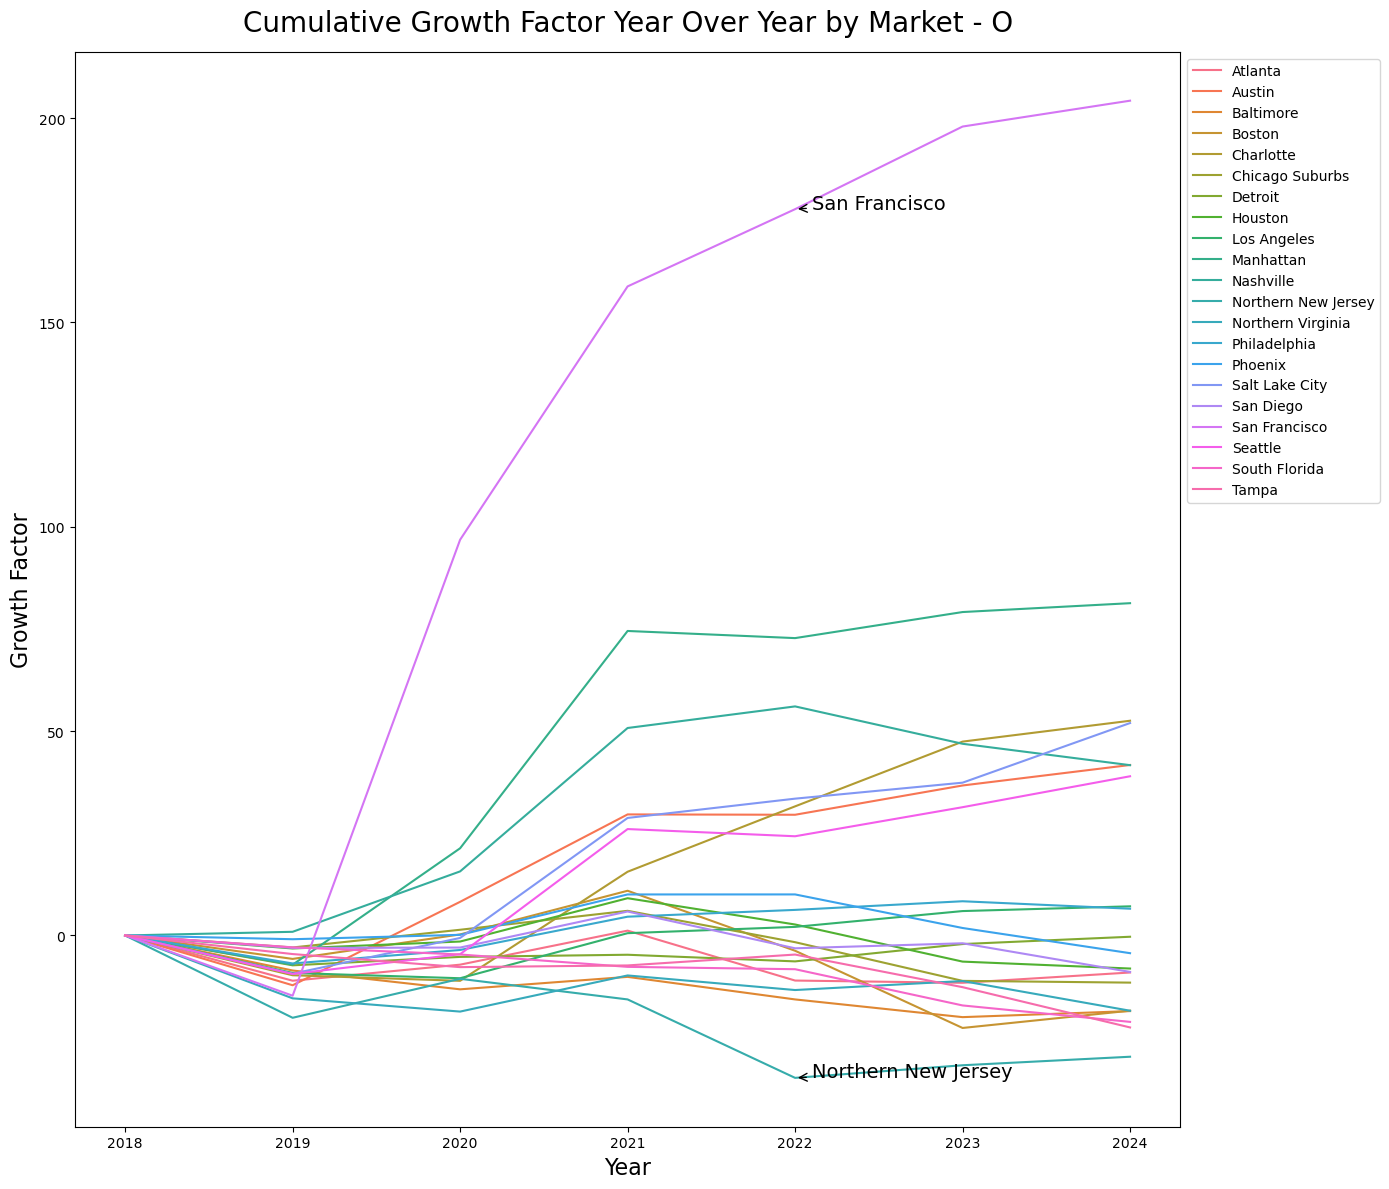

In [170]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=df_double_sorted_O, x='year', y='cumulative_growth_factor', hue='market')


last_year = 2022
last_value = df_double_sorted_O[df_double_sorted_O['market'] == 'San Francisco'].loc[df_double_sorted_O['year'] == last_year, 'cumulative_growth_factor'].values[0]

# Annotate the plot with the market name
plt.annotate('San Francisco', 
                xy=(last_year, last_value), 
                xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                arrowprops=dict(arrowstyle="->", color='black'),
                fontsize=14)

last_year = 2022
last_value = df_double_sorted_O[df_double_sorted_O['market'] == 'Northern New Jersey'].loc[df_double_sorted_O['year'] == last_year, 'cumulative_growth_factor'].values[0]

# Annotate the plot with the market name
plt.annotate('Northern New Jersey', 
                xy=(last_year, last_value), 
                xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                arrowprops=dict(arrowstyle="->", color='black'),
                fontsize=14)


plt.title('Cumulative Growth Factor Year Over Year by Market - O', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()